In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error
from sklearn import model_selection, preprocessing, ensemble
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from scipy import sparse
import xgboost as xgb

import string
from scipy.stats import boxcox

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

import s2sphere

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
train_df = pd.read_json('C:/Users/parth/Desktop/Git/Projects/TwoSigma/Data/train.json')
train_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [57]:
test_df = pd.read_json('C:/Users/parth/Desktop/Git/Projects/TwoSigma/Data/test.json')
test_df.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
100,1.0,1,3dbbb69fd52e0d25131aa1cd459c87eb,2016-06-03 04:29:40,New York chic has reached a new level ...,101 East 10th Street,"[Doorman, Elevator, No Fee]",40.7306,7103890,-73.9890,9ca6f3baa475c37a3b3521a394d65467,[https://photos.renthop.com/2/7103890_85b33077...,3758,101 East 10th Street


In [58]:
selectedFeatures = []

In [59]:
train_df['bathrooms'].ix[train_df['bathrooms']>3] = 4
test_df['bathrooms'].ix[test_df['bathrooms']>3] = 4
selectedFeatures.append('bathrooms')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
train_df['bedrooms'].ix[train_df['bedrooms']>3] = 4
test_df['bedrooms'].ix[test_df['bedrooms']>3] = 4
selectedFeatures.append('bedrooms')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [61]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

ulimitTest = np.percentile(test_df.price.values, 99)
test_df['price'].ix[test_df['price']>ulimitTest] = ulimitTest
selectedFeatures.append('price')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
train_df["created"] = pd.to_datetime(train_df["created"])
test_df["created"] = pd.to_datetime(test_df["created"])

train_df["month_created"] = train_df["created"].dt.month
train_df["day_created"] = train_df["created"].dt.day

test_df["month_created"] = test_df["created"].dt.month
test_df["day_created"] = test_df["created"].dt.day

train_df["hour_created"] = train_df["created"].dt.hour
test_df["hour_created"] = test_df["created"].dt.hour

selectedFeatures.append('month_created')
selectedFeatures.append('day_created')
selectedFeatures.append('hour_created')

In [63]:
train_df["noofFeatures"] = train_df["features"].apply(len)
test_df["noofFeatures"] = test_df["features"].apply(len)

train_df['noofFeatures'].ix[train_df['noofFeatures']>17] = 17
test_df['noofFeatures'].ix[test_df['noofFeatures']>17] = 17

selectedFeatures.append('noofFeatures')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
train_df["noOfDescWords"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["noOfDescWords"] = test_df["description"].apply(lambda x: len(x.split(" ")))

selectedFeatures.append('noOfDescWords')

In [65]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<llimit] = llimit
train_df['latitude'].ix[train_df['latitude']>ulimit] = ulimit

llimit = np.percentile(test_df.latitude.values, 1)
ulimit = np.percentile(test_df.latitude.values, 99)
test_df['latitude'].ix[test_df['latitude']<llimit] = llimit
test_df['latitude'].ix[test_df['latitude']>ulimit] = ulimit

selectedFeatures.append('latitude')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [66]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<llimit] = llimit
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

llimit = np.percentile(test_df.longitude.values, 1)
ulimit = np.percentile(test_df.longitude.values, 99)
test_df['longitude'].ix[test_df['longitude']<llimit] = llimit
test_df['longitude'].ix[test_df['longitude']>ulimit] = ulimit

selectedFeatures.append('longitude')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
train_df["noofPhotos"] = train_df["photos"].apply(len)
test_df["noofPhotos"] = test_df["photos"].apply(len)

train_df["noofPhotos"].ix[train_df["noofPhotos"]>20] = 20
test_df["noofPhotos"].ix[test_df["noofPhotos"]>20] = 20

selectedFeatures.append('noofPhotos')

C:\Users\parth\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train_df['manager_id'].values))
train_df['manager_id'] = lbl.transform(list(train_df['manager_id'].values))

lbl.fit(list(test_df['manager_id'].values))
test_df['manager_id'] = lbl.transform(list(test_df['manager_id'].values))

selectedFeatures.append('manager_id')

In [69]:
'''
lat = train_df.latitude.values.tolist()
lon = train_df.longitude.values.tolist()

cellId = []
for i in range(0,len(lat)):
    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])
    cell = s2sphere.CellId.from_lat_lng(p1)
    cellId.append(cell.id())

se = pd.Series(cellId)
train_df['cellId'] = se.values

lat = test_df.latitude.values.tolist()
lon = test_df.longitude.values.tolist()

cellId = []
for i in range(0,len(lat)):
    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])
    cell = s2sphere.CellId.from_lat_lng(p1)
    cellId.append(cell.id())

se = pd.Series(cellId)
test_df['cellId'] = se.values
#print(len(cellId))
#print(cellId)
#print(train_df['cellId'])
selectedFeatures.append('cellId')
'''

"\nlat = train_df.latitude.values.tolist()\nlon = train_df.longitude.values.tolist()\n\ncellId = []\nfor i in range(0,len(lat)):\n    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])\n    cell = s2sphere.CellId.from_lat_lng(p1)\n    cellId.append(cell.id())\n\nse = pd.Series(cellId)\ntrain_df['cellId'] = se.values\n\nlat = test_df.latitude.values.tolist()\nlon = test_df.longitude.values.tolist()\n\ncellId = []\nfor i in range(0,len(lat)):\n    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])\n    cell = s2sphere.CellId.from_lat_lng(p1)\n    cellId.append(cell.id())\n\nse = pd.Series(cellId)\ntest_df['cellId'] = se.values\n#print(len(cellId))\n#print(cellId)\n#print(train_df['cellId'])\nselectedFeatures.append('cellId')\n"

In [70]:
lat = train_df.latitude.values.tolist()
lon = train_df.longitude.values.tolist()

cellId1 = []
cellId2 = []
cellId3 = []
for i in range(0,len(lat)):
    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])
    cell = s2sphere.CellId.from_lat_lng(p1)
    cid = str(cell.id())
    #print(cid)
    cellId1.append(int(cid[:6]))
    cellId2.append(int(cid[6:12]))
    cellId3.append(int(cid[12:19]))
    

se = pd.Series(cellId1)
train_df['cellId1'] = se.values

se = pd.Series(cellId2)
train_df['cellId2'] = se.values

se = pd.Series(cellId3)
train_df['cellId3'] = se.values

lat = test_df.latitude.values.tolist()
lon = test_df.longitude.values.tolist()

cellId1 = []
cellId2 = []
cellId3 = []
for i in range(0,len(lat)):
    p1 = s2sphere.LatLng.from_degrees(lat[i], lon[i])
    cell = s2sphere.CellId.from_lat_lng(p1)
    cid = str(cell.id())
    #print(cid)
    cellId1.append(int(cid[:6]))
    cellId2.append(int(cid[6:12]))
    cellId3.append(int(cid[12:19]))
    

se = pd.Series(cellId1)
test_df['cellId1'] = se.values

se = pd.Series(cellId2)
test_df['cellId2'] = se.values

se = pd.Series(cellId1)
test_df['cellId3'] = se.values

selectedFeatures.extend(['cellId1','cellId2','cellId3'])

In [33]:
'''
import itertools
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

feature2d = train_df['features'].values.tolist()
featureTest2d = test_df['features'].values.tolist()
allFeatures = list(itertools.chain.from_iterable(a))
allFeatures = [x.upper() for x in allFeatures]

ps = PorterStemmer()
newallFeatures = []
for w in allFeatures:
    newallFeatures.append(ps.stem(w))

featureCounts = list(Counter(newallFeatures).most_common(72))

list_of_fc = [list(elem) for elem in featureCounts]
#print(list_of_fc)


sum = 0
for i in range(0,72):
    sum = sum + list_of_fc[i][1]
#print(sum)

for i in range(0,72):
    list_of_fc[i][1] = list_of_fc[i][1]/sum
    
featureValue = []
for i in range(0,len(feature2d)):
    if(len(feature2d[i]) == 0):
        featureValue.append(0)
    else:
        tempList = feature2d[i]
        tempList = [x.upper() for x in tempList]
        sumV = 0
        for w in tempList:
            str = ps.stem(w)
            #print(str)
            for sublist in list_of_fc:
                if sublist[0] == str:
                    sumV = sumV + sublist[1]
                    break
        featureValue.append(sumV)

se = pd.Series(featureValue)
train_df['featureValue'] = se.values

featureValue = []
for i in range(0,len(featureTest2d)):
    if(len(featureTest2d[i]) == 0):
        featureValue.append(0)
    else:
        tempList = featureTest2d[i]
        tempList = [x.upper() for x in tempList]
        sumV = 0
        for w in tempList:
            str = ps.stem(w)
            #print(str)
            for sublist in list_of_fc:
                if sublist[0] == str:
                    sumV = sumV + sublist[1]
                    break
        featureValue.append(sumV)

se = pd.Series(featureValue)
test_df['featureValue'] = se.values


#train_df.head(3)
selectedFeatures.append('featureValue')
'''

"\nimport itertools\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import sent_tokenize, word_tokenize\nfrom collections import Counter\n\nfeature2d = train_df['features'].values.tolist()\nfeatureTest2d = test_df['features'].values.tolist()\nallFeatures = list(itertools.chain.from_iterable(a))\nallFeatures = [x.upper() for x in allFeatures]\n\nps = PorterStemmer()\nnewallFeatures = []\nfor w in allFeatures:\n    newallFeatures.append(ps.stem(w))\n\nfeatureCounts = list(Counter(newallFeatures).most_common(72))\n\nlist_of_fc = [list(elem) for elem in featureCounts]\n#print(list_of_fc)\n\n\nsum = 0\nfor i in range(0,72):\n    sum = sum + list_of_fc[i][1]\n#print(sum)\n\nfor i in range(0,72):\n    list_of_fc[i][1] = list_of_fc[i][1]/sum\n    \nfeatureValue = []\nfor i in range(0,len(feature2d)):\n    if(len(feature2d[i]) == 0):\n        featureValue.append(0)\n    else:\n        tempList = feature2d[i]\n        tempList = [x.upper() for x in tempList]\n        sumV = 0\n        f

In [34]:
'''
categorical = ["display_address", "building_id", "street_address"]
for f in categorical:
        if train_df[f].dtype=='object':
            #print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values) + list(test_df[f].values))
            train_df[f] = lbl.transform(list(train_df[f].values))
            test_df[f] = lbl.transform(list(test_df[f].values))
            selectedFeatures.append(f)
'''

'\ncategorical = ["display_address", "building_id", "street_address"]\nfor f in categorical:\n        if train_df[f].dtype==\'object\':\n            #print(f)\n            lbl = preprocessing.LabelEncoder()\n            lbl.fit(list(train_df[f].values) + list(test_df[f].values))\n            train_df[f] = lbl.transform(list(train_df[f].values))\n            test_df[f] = lbl.transform(list(test_df[f].values))\n            selectedFeatures.append(f)\n'

In [35]:
'''
train_df['newfeatures'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
test_df['newfeatures'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))
print(train_df["newfeatures"].head(3))
tfidf = CountVectorizer(stop_words='english', max_features=200)
tr_sparse = tfidf.fit_transform(train_df["newfeatures"])
te_sparse = tfidf.transform(test_df["newfeatures"])
'''

'\ntrain_df[\'newfeatures\'] = train_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))\ntest_df[\'newfeatures\'] = test_df["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))\nprint(train_df["newfeatures"].head(3))\ntfidf = CountVectorizer(stop_words=\'english\', max_features=200)\ntr_sparse = tfidf.fit_transform(train_df["newfeatures"])\nte_sparse = tfidf.transform(test_df["newfeatures"])\n'

In [71]:
X = train_df[selectedFeatures]
y = train_df["interest_level"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33)

X_test = test_df[selectedFeatures]

In [72]:
temp = pd.concat([X_train.manager_id,pd.get_dummies(y_train)], axis = 1).groupby('manager_id').mean()
temp.columns = ['high_frac','low_frac', 'medium_frac']
temp['count'] = X_train.groupby('manager_id').count().iloc[:,1]

# remember the manager_ids look different because we encoded them in the previous step 
print(temp.tail(10))

            high_frac  low_frac  medium_frac  count
manager_id                                         
3468         0.000000  0.461538     0.538462     13
3469         0.000000  0.500000     0.500000      2
3471         0.000000  0.666667     0.333333      3
3472         0.833333  0.166667     0.000000      6
3475         0.166667  0.666667     0.166667      6
3476         0.000000  1.000000     0.000000      1
3477         0.000000  1.000000     0.000000      7
3478         0.000000  1.000000     0.000000      2
3479         0.200000  0.600000     0.200000      5
3480         0.043478  0.666667     0.289855     69


In [73]:
countOfCounts = temp["count"].value_counts()
#print(temp["count"].describe())

# compute skill
temp['manager_skill'] = temp['high_frac']*2 + temp['medium_frac']

# get ixes for unranked managers...
unranked_managers_ixes = temp['count']<10
# ... and ranked ones
ranked_managers_ixes = ~unranked_managers_ixes

# compute mean values from ranked managers and assign them to unranked ones
mean_values = temp.loc[ranked_managers_ixes, ['high_frac','low_frac', 'medium_frac','manager_skill']].mean()
print(mean_values)
temp.loc[unranked_managers_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
print(temp.tail(10))

high_frac        0.084394
low_frac         0.678290
medium_frac      0.237316
manager_skill    0.406103
dtype: float64
            high_frac  low_frac  medium_frac  count  manager_skill
manager_id                                                        
3468         0.000000  0.461538     0.538462     13       0.538462
3469         0.084394  0.678290     0.237316      2       0.406103
3471         0.084394  0.678290     0.237316      3       0.406103
3472         0.084394  0.678290     0.237316      6       0.406103
3475         0.084394  0.678290     0.237316      6       0.406103
3476         0.084394  0.678290     0.237316      1       0.406103
3477         0.084394  0.678290     0.237316      7       0.406103
3478         0.084394  0.678290     0.237316      2       0.406103
3479         0.084394  0.678290     0.237316      5       0.406103
3480         0.043478  0.666667     0.289855     69       0.376812


In [74]:
X_train = X_train.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
X_train.head()

,bathrooms,bedrooms,price,month_created,day_created,hour_created,noofFeatures,noOfDescWords,latitude,longitude,noofPhotos,manager_id,cellId1,cellId2,cellId3,high_frac,low_frac,medium_frac,count,manager_skill
0,2.0,3,3900.0,4,11,2,17,69,40.7709,-73.9318,18,717,992660,130751,1269345,0.083333,0.666667,0.250000,12,0.416667
1,1.0,2,3200.0,5,14,2,1,58,40.7707,-73.9522,3,1921,992659,407868,9125421,0.076923,0.923077,0.000000,13,0.153846
2,2.0,3,5000.0,4,29,4,7,95,40.7447,-74.0052,8,3341,992659,517799,4038521,0.172414,0.275862,0.551724,29,0.896552
3,1.0,2,4295.0,5,19,1,4,1,40.7399,-73.9864,0,1338,992659,507730,7968367,0.000000,1.000000,0.000000,275,0.000000
4,4.0,4,12000.0,5,3,6,13,148,40.7928,-73.9748,7,2338,992659,384574,4725845,0.000000,0.959770,0.040230,174,0.040230


In [75]:
# add the features computed on the training dataset to the validation dataset
X_val = X_val.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
new_manager_ixes = X_val['high_frac'].isnull()
X_val.loc[new_manager_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
X_val.head()

,bathrooms,bedrooms,price,month_created,day_created,hour_created,noofFeatures,noOfDescWords,latitude,longitude,noofPhotos,manager_id,cellId1,cellId2,cellId3,high_frac,low_frac,medium_frac,count,manager_skill
0,1.0,1,4600.0,4,15,1,4,93,40.7348,-74.0050,7,3074,992659,502480,4702749,0.084394,0.678290,0.237316,NaN,0.406103
1,1.0,0,2100.0,6,6,3,6,73,40.7587,-73.9838,5,3135,992659,365323,26165,0.063642,0.686506,0.249853,1697.0,0.377136
2,1.0,0,3365.0,6,24,4,10,131,40.7760,-73.9839,10,1795,992659,369840,5988025,0.000000,0.800000,0.200000,20.0,0.200000
3,1.0,2,3300.0,6,21,4,11,140,40.7612,-73.9978,6,1383,992659,361300,1587065,0.117647,0.764706,0.117647,17.0,0.352941
4,1.0,1,3500.0,6,12,13,3,9,40.7923,-73.9771,13,2178,992659,384459,3862649,0.084394,0.678290,0.237316,6.0,0.406103


In [76]:
X_test = X_test.merge(temp.reset_index(),how='left', left_on='manager_id', right_on='manager_id')
new_manager_ixes = X_test['high_frac'].isnull()
X_test.loc[new_manager_ixes,['high_frac','low_frac', 'medium_frac','manager_skill']] = mean_values.values
X_test.head()

,bathrooms,bedrooms,price,month_created,day_created,hour_created,noofFeatures,noOfDescWords,latitude,longitude,noofPhotos,manager_id,cellId1,cellId2,cellId3,high_frac,low_frac,medium_frac,count,manager_skill
0,1.0,1,2950.0,6,11,5,6,78,40.7185,-73.9865,8,2694,992659,493922,992659,0.084394,0.678290,0.237316,1.0,0.406103
1,1.0,2,2850.0,6,24,6,3,35,40.7278,-74.0000,3,3145,992659,499514,992659,0.084394,0.678290,0.237316,7.0,0.406103
2,1.0,1,3758.0,6,3,4,3,333,40.7306,-73.9890,6,2346,992659,505508,992659,0.084394,0.678290,0.237316,2.0,0.406103
3,1.0,2,3300.0,6,11,6,10,204,40.7109,-73.9571,6,179,992659,754722,992659,0.045455,0.454545,0.500000,22.0,0.590909
4,2.0,2,4900.0,4,12,5,14,174,40.7650,-73.9845,7,2764,992659,366169,992659,0.000000,0.894231,0.105769,208.0,0.105769


In [77]:
basicFetures = selectedFeatures[:]
selectedFeatures.extend(['high_frac','low_frac', 'medium_frac','manager_skill'])

print(basicFetures)
print(selectedFeatures)

['bathrooms', 'bedrooms', 'price', 'month_created', 'day_created', 'hour_created', 'noofFeatures', 'noOfDescWords', 'latitude', 'longitude', 'noofPhotos', 'manager_id', 'cellId1', 'cellId2', 'cellId3']
['bathrooms', 'bedrooms', 'price', 'month_created', 'day_created', 'hour_created', 'noofFeatures', 'noOfDescWords', 'latitude', 'longitude', 'noofPhotos', 'manager_id', 'cellId1', 'cellId2', 'cellId3', 'high_frac', 'low_frac', 'medium_frac', 'manager_skill']


In [78]:
currentFeatures = basicFetures[:]#.extend('manager_skill')
currentFeatures.append('manager_skill')
currentFeatures.remove('manager_id')
print(currentFeatures)

['bathrooms', 'bedrooms', 'price', 'month_created', 'day_created', 'hour_created', 'noofFeatures', 'noOfDescWords', 'latitude', 'longitude', 'noofPhotos', 'cellId1', 'cellId2', 'cellId3', 'manager_skill']


In [79]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1200, n_jobs=-1, oob_score=True,
            random_state=None, verbose=0, warm_start=False)
clf.fit(X_train[currentFeatures], y_train)
y_val_pred = clf.predict_proba(X_val[currentFeatures])
print(log_loss(y_val, y_val_pred))



0.588286147639


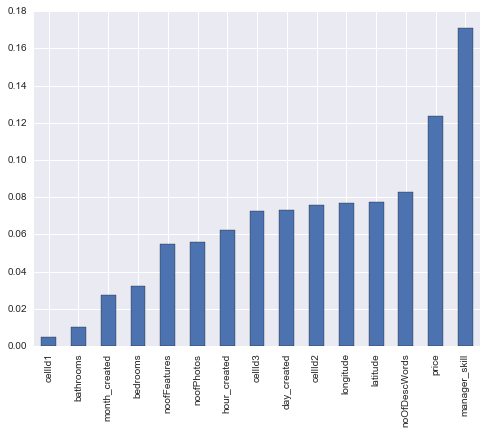

In [80]:
plt.figure(figsize=(8,6))
pd.Series(index = currentFeatures, data = clf.feature_importances_).sort_values().plot(kind = 'bar')
plt.show()

In [81]:
target_num_map = {'high':0, 'medium':1, 'low':2}
y = clf.predict_proba(X_test[currentFeatures])

sub = pd.DataFrame()
sub["listing_id"] = test_df["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = y[:, target_num_map[label]]
sub.to_csv("C:/Users/parth/Desktop/Git/Projects/TwoSigma/Data/submission_rf_1.csv", index=False)

In [51]:
'''
print(currentFeatures)
currentFeatures.remove('noofFeatures')
print(currentFeatures)
'''
print(train_X['cellId'].head())

0    9926594007210402951
1    9926601697464556445
2    9926593674604722239
3    9926594092331178175
4    9926594041501383183
Name: cellId, dtype: object


In [82]:
train_X = pd.concat((X_train[currentFeatures], X_val[currentFeatures]), axis=0)
train_y = pd.concat((y_train, y_val), axis=0)

In [55]:
#train_X['cellId'] = train_X['cellId'].convert_objects(convert_numeric=True)
#X_test['cellId'] = X_test['cellId'].convert_objects(convert_numeric=True)

#train_X['cellId'] = pd.to_numeric(train_X.cellId.values, errors='coerce')
#X_test['cellId'] = pd.to_numeric(X_test['cellId'], errors='coerce')

#print(train_X['cellId'].head())

0    9926594007210402951
1    9926601697464556445
2    9926593674604722239
3    9926594092331178175
4    9926594041501383183
Name: cellId, dtype: object


In [83]:
trainX = sparse.csr_matrix(train_X.values)
testX = sparse.csr_matrix(X_test[currentFeatures].values)

In [84]:
train_y = pd.DataFrame(train_y)
y_map = {'low': 2, 'medium': 1, 'high': 0}
train_y['interest_level'] = train_y['interest_level'].apply(lambda x: y_map[x])
train_Y = train_y.interest_level.values
train_Y

array([2, 2, 0, ..., 2, 2, 2], dtype=int64)

In [85]:
def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=0, num_rounds=1500):
    param = {}
    param['objective'] = 'multi:softprob'
    param['eta'] = 0.1
    param['max_depth'] = 6
    param['silent'] = 1
    param['num_class'] = 3
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=1500)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [86]:
cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for dev_index, val_index in kf.split(range(trainX.shape[0])):
        dev_X, val_X = trainX[dev_index,:], trainX[val_index,:]
        dev_y, val_y = train_Y[dev_index], train_Y[val_index]
        preds, model = runXGB(dev_X, dev_y, val_X, val_y)
        cv_scores.append(log_loss(val_y, preds))
        print(cv_scores)
        break

Will train until test error hasn't decreased in 1500 rounds.
[0]	train-mlogloss:1.041235	test-mlogloss:1.041851
[1]	train-mlogloss:0.985637	test-mlogloss:0.987141
[2]	train-mlogloss:0.941101	test-mlogloss:0.943598
[3]	train-mlogloss:0.902784	test-mlogloss:0.906155
[4]	train-mlogloss:0.868083	test-mlogloss:0.872005
[5]	train-mlogloss:0.838114	test-mlogloss:0.842563
[6]	train-mlogloss:0.812996	test-mlogloss:0.818048
[7]	train-mlogloss:0.790434	test-mlogloss:0.796243
[8]	train-mlogloss:0.768981	test-mlogloss:0.775617
[9]	train-mlogloss:0.749818	test-mlogloss:0.757191
[10]	train-mlogloss:0.734133	test-mlogloss:0.742034
[11]	train-mlogloss:0.719419	test-mlogloss:0.727897
[12]	train-mlogloss:0.705133	test-mlogloss:0.714171
[13]	train-mlogloss:0.693805	test-mlogloss:0.703592
[14]	train-mlogloss:0.681970	test-mlogloss:0.692490
[15]	train-mlogloss:0.672493	test-mlogloss:0.683665
[16]	train-mlogloss:0.663599	test-mlogloss:0.675324
[17]	train-mlogloss:0.655472	test-mlogloss:0.667947
[18]	train-ml

[0.62452763831061175]


[1499]	train-mlogloss:0.132188	test-mlogloss:0.624527
C:\Users\parth\Anaconda3\lib\site-packages\xgboost-0.40-py3.5.egg\xgboost.py:474: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)


In [87]:
preds, model = runXGB(trainX, train_Y, testX, num_rounds=1000)
out_df = pd.DataFrame(preds)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("C:/Users/parth/Desktop/Git/Projects/TwoSigma/Data/xgb_submission5.csv", index=False)

C:\Users\parth\Anaconda3\lib\site-packages\xgboost-0.40-py3.5.egg\xgboost.py:474: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
